In [ ]:
import joblib

In [ ]:
!pip install numpy matplotlib seaborn pandas scikit-learn pandas-profiling


In [ ]:
!pip install pydantic-settings

# Updated import statement
from pydantic_settings import BaseSettings

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

import seaborn as sns
from sklearn.utils import shuffle
from pydantic_settings import BaseSettings
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, precision_score, roc_curve # Removed plot_roc_curve
# Import ConfusionMatrixDisplay and RocCurveDisplay for plotting
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DiseaseAndSymptoms.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in df.columns:

    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


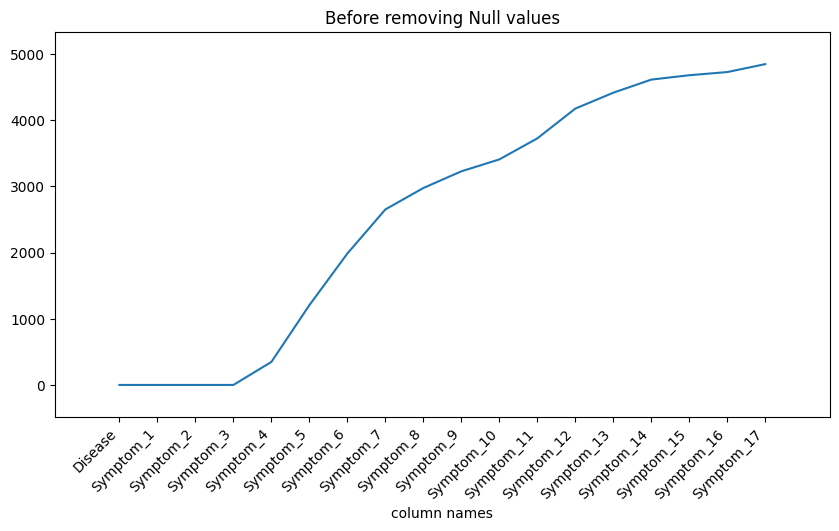

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [ ]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head

<bound method NDFrame.head of                   Disease       Symptom_1           Symptom_2  \
0                    Acne       skin rash          blackheads   
1                    Acne       skin rash  pus filled pimples   
2         Hyperthyroidism         fatigue         mood swings   
3                    AIDS  muscle wasting   patches in throat   
4     Chronic cholestasis         itching            vomiting   
...                   ...             ...                 ...   
4915            Psoriasis       skin rash          joint pain   
4916  Peptic ulcer diseae        vomiting         indigestion   
4917               Dengue       skin rash              chills   
4918     Fungal infection         itching           skin rash   
4919        Drug Reaction         itching           skin rash   

                 Symptom_3               Symptom_4             Symptom_5  \
0                 scurring                     NaN                   NaN   
1               blackheads                scurring                   NaN   
2              weight loss            restlessness              sweating   
3               high fever  extra marital contacts                   NaN   
4           yellowish skin                  nausea      loss of appetite   
...                    ...                     ...                   ...   
4915          skin peeling     silver like dusting  small dents in nails   
4916      loss of appetite          abdominal pain      internal itching   
4917            joint pain                vomiting               fatigue   
4918  nodal skin eruptions     dischromic  patches                   NaN   
4919          stomach pain     burning micturition   spotting  urination   

               Symptom_6          Symptom_7         Symptom_8  \
0                    NaN                NaN               NaN   
1                    NaN                NaN               NaN   
2              diarrhoea    fast heart rate  excessive hunger   
3                    NaN                NaN               NaN   
4         abdominal pain  yellowing of eyes               NaN   
...                  ...                ...               ...   
4915  inflammatory nails                NaN               NaN   
4916                 NaN                NaN               NaN   
4917          high fever           headache            nausea   
4918                 NaN                NaN               NaN   
4919                 NaN                NaN               NaN   

             Symptom_9            Symptom_10             Symptom_11  \
0                  NaN                   NaN                    NaN   
1                  NaN                   NaN                    NaN   
2      muscle weakness          irritability  abnormal menstruation   
3                  NaN                   NaN                    NaN   
4                  NaN                   NaN                    NaN   
...                ...                   ...                    ...   
4915               NaN                   NaN                    NaN   
4916               NaN                   NaN                    NaN   
4917  loss of appetite  pain behind the eyes              back pain   
4918               NaN                   NaN                    NaN   
4919               NaN                   NaN                    NaN   

     Symptom_12   Symptom_13           Symptom_14 Symptom_15 Symptom_16  \
0           NaN          NaN                  NaN        NaN        NaN   
1           NaN          NaN                  NaN        NaN        NaN   
2           NaN          NaN                  NaN        NaN        NaN   
3           NaN          NaN                  NaN        NaN        NaN   
4           NaN          NaN                  NaN        NaN        NaN   
...         ...          ...                  ...        ...        ...   
4915        NaN          NaN                  NaN        NaN        NaN   
4916        NaN          NaN              

In [ ]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [ ]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [ ]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [ ]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


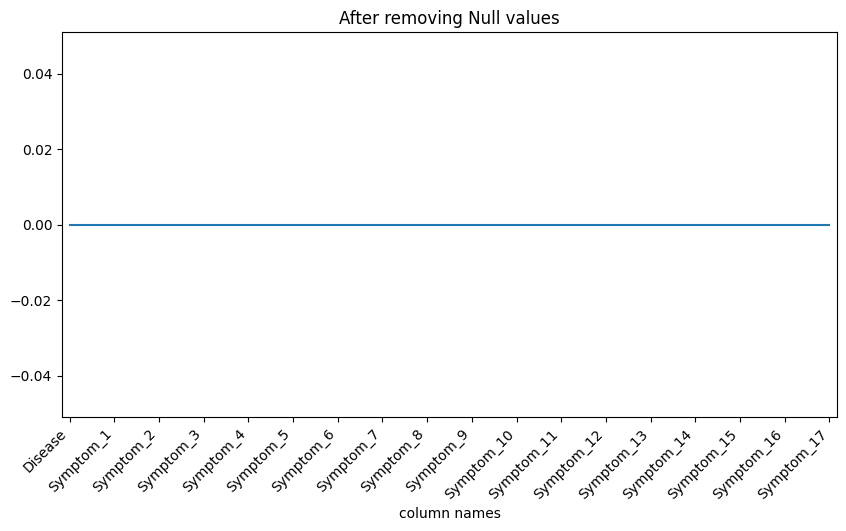

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [ ]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [ ]:
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [ ]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


<Axes: >

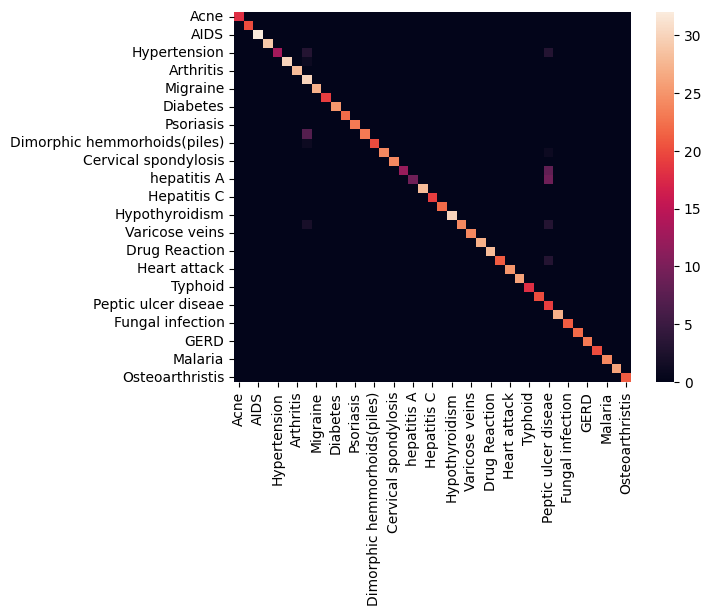

In [ ]:
tree =DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=13)
tree.fit(x_train, y_train)
preds=tree.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
DS_train =cross_val_score(tree, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(DS_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (DS_train.mean()*100.0, DS_train.std()*100.0))

Mean Accuracy: 95.706%, Standard Deviation: (1.99%)


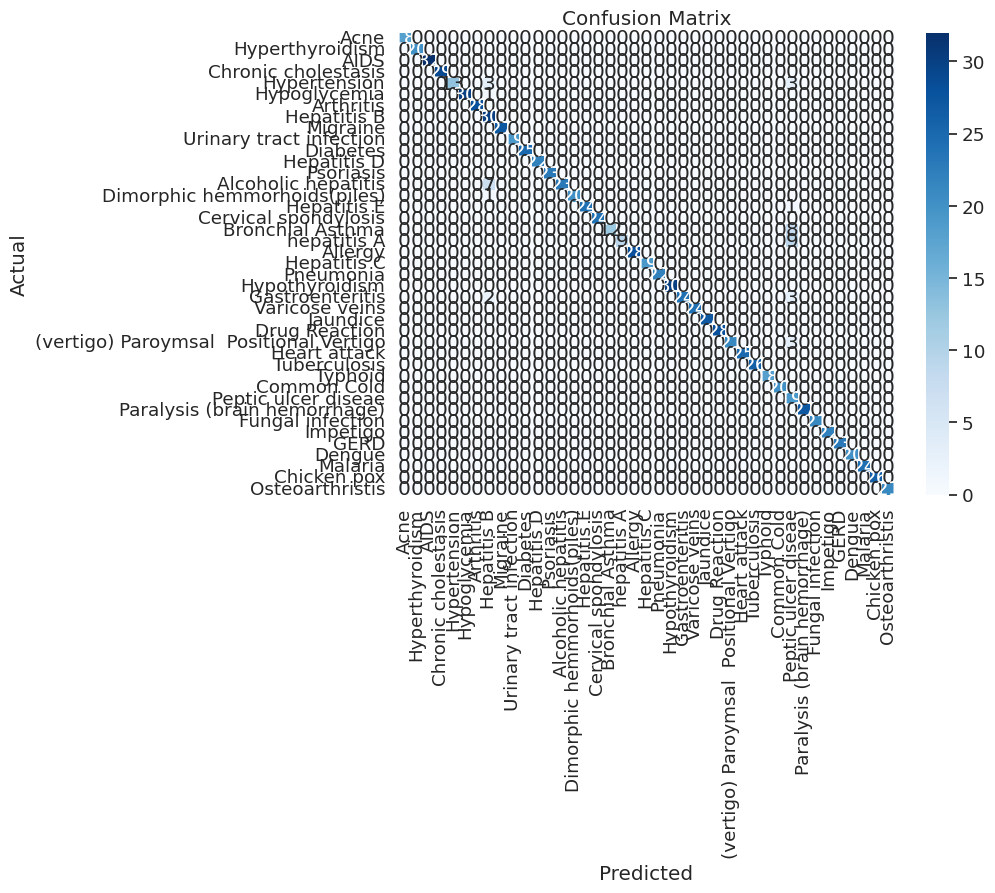

In [ ]:
# Confusion Matrix
preds = tree.predict(x_test) # Calculate predictions
cm = confusion_matrix(y_test, preds) # Use preds instead of y_pred

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Disease'].unique(), yticklabels=df['Disease'].unique()) # Use df['Disease'].unique() for labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

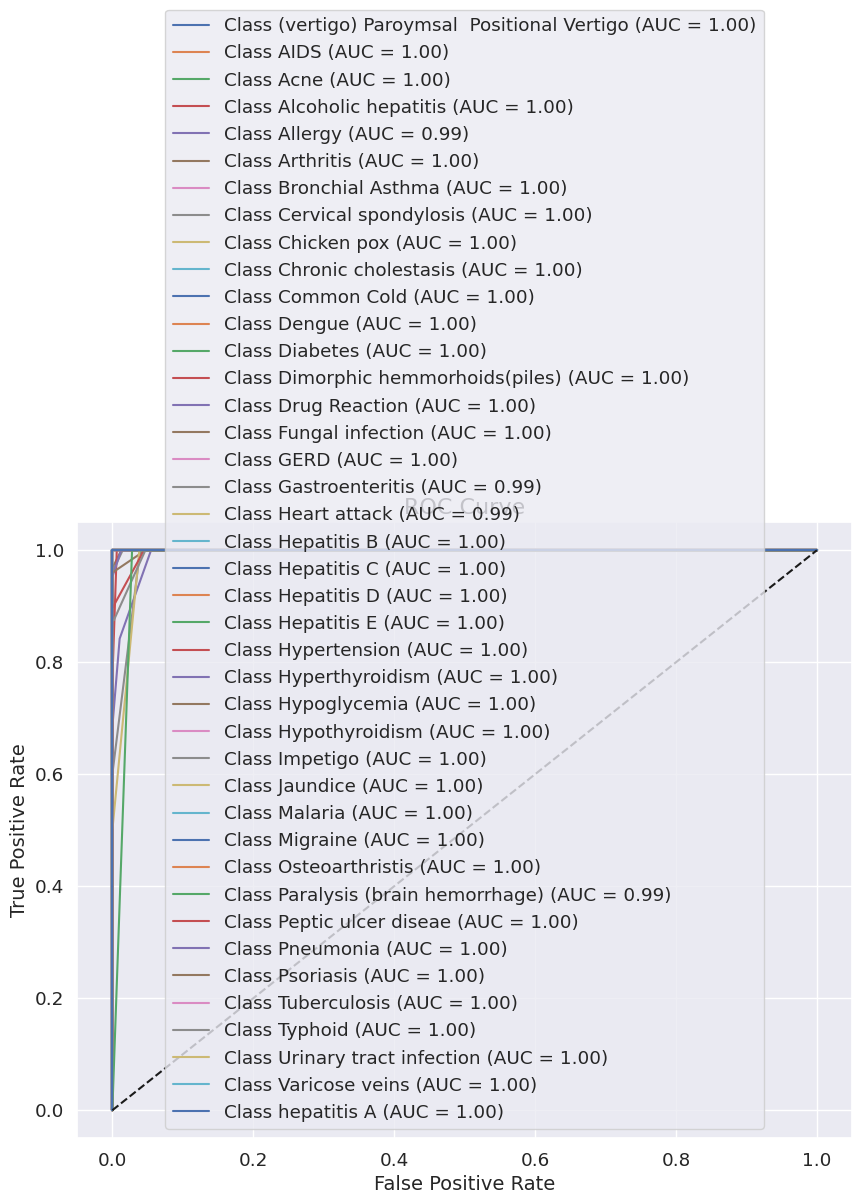

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test and y_pred_prob are already defined and y_test contains numerical labels
plt.figure(figsize=(10, 8))

# Find unique classes
unique_classes = np.unique(y_test)

# Calculate y_pred_prob using your trained model
y_pred_prob = tree.predict_proba(x_test)  # Ensure this is the correct function for your model

for i in range(len(unique_classes)):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=unique_classes[i])
    auc = roc_auc_score((y_test == unique_classes[i]).astype(int), y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {unique_classes[i]} (AUC = {auc:.2f})')

# Plotting diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--')

# Enhancing the plot
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc='best')
plt.grid(True)
plt.show()


Accuracy: 0.9583333333333334
Precision: 0.9779234551238792
Recall: 0.9544777143352154
F1 Score: 0.957812664665753
Confusion Matrix:
 [[18  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 21]]


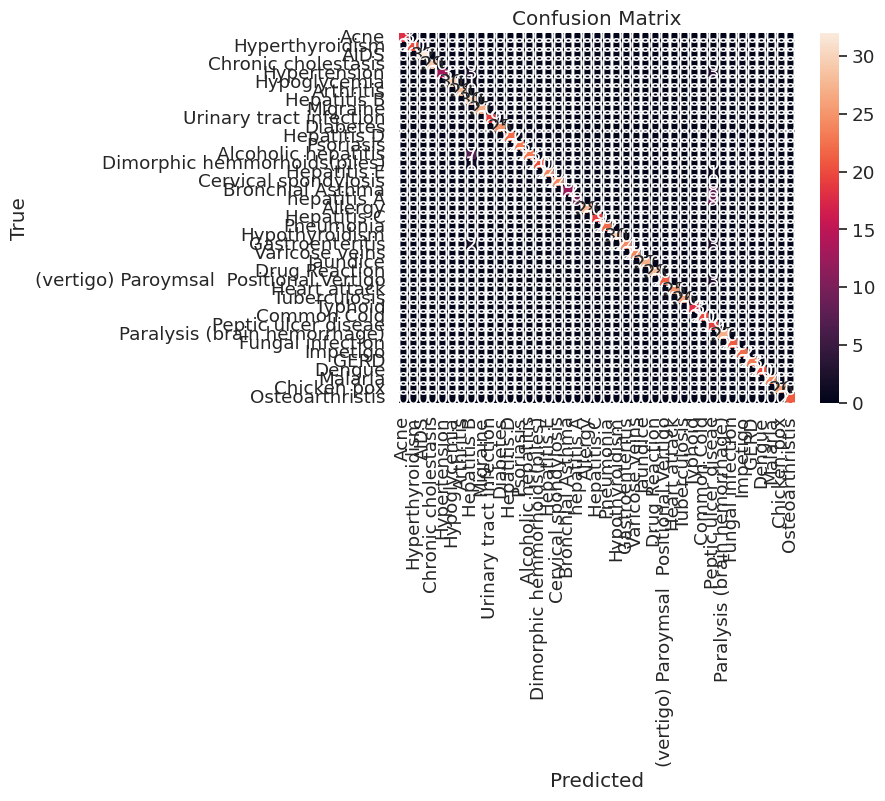

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

# Accuracy
accuracy = accuracy_score(y_test, preds)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, preds, average='macro')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, preds, average='macro')
print('Recall:', recall)

# F1 Score
f1 = f1_score(y_test, preds, average='macro')
print('F1 Score:', f1)

# Confusion Matrix
conf_mat = confusion_matrix(y_test, preds)
print('Confusion Matrix:\n', conf_mat)

# Plot Confusion Matrix
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=df['Disease'].unique(), yticklabels=df['Disease'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve (assuming binary classification for simplicity)
if len(np.unique(y_test)) == 2:  # This is for binary classification
    y_prob = tree.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [ ]:
# Save the trained model to a file
joblib.dump(tree, '/content/drive/MyDrive/decision_tree_model.pkl')

['/content/drive/MyDrive/decision_tree_model.pkl']

In [4]:
import joblib
model = joblib.load('/content/drive/MyDrive/decision_tree_model.pkl')

# Check the model type
print(type(model))  # Should be <class 'sklearn.tree.DecisionTreeClassifier'>

# Check for any unexpected attributes
print(dir(model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_missing_values_in_feature_mask', '_estimator_type', '_fit', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_support_missing_values', '_validate_X_predict', '_validate_data', '_validate_params', 'apply', 'ccp_alpha', 'class_weight', 'classes_', 'cost_complex

In [6]:
from sklearn.tree import DecisionTreeClassifier  # or DecisionTreeRegressor

# Load your trained decision tree model
model = joblib.load('/content/drive/MyDrive/decision_tree_model.pkl')

# If feature names were provided during training (with a DataFrame):
if hasattr(model, 'feature_names_in_'):
    feature_names = model.feature_names_in_
else:
    # If no feature names were provided, you only have the indices
    feature_names = [f'Feature {i}' for i in range(model.n_features_in_)]

print("Features used in the model:")
for i, name in enumerate(feature_names):
    print(f"{i}: {name}")


Features used in the model:
0: Feature 0
1: Feature 1
2: Feature 2
3: Feature 3
4: Feature 4
5: Feature 5
6: Feature 6
7: Feature 7
8: Feature 8
9: Feature 9
10: Feature 10
11: Feature 11
12: Feature 12
13: Feature 13
14: Feature 14
15: Feature 15
16: Feature 16
